## Chapter 1. 판다스로 데이터 다루기 체험

### 1.1. 엑셀의 시계열 데이터 3분 단위로 집계하기

In [4]:
# 코드 1-1. 판다스 라이브러리 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 출력 옵션: 6행까지 출력

[코드 1-2]
- 변수 `url1`은 웹에 올려진 엑셀 파일의 주소이다. (주소를 우클릭하면 다운로드할 수 있다.)
- `read_excel` 함수의 `parse_dates=['DATE']` 부분은 `Date` 열을 시계열 자료형으로 불러오는 기능이다.
- 엑셀 파일에서 불러온 데이터 프레임은 변수 `df1`으로 저장한다.

In [6]:
# 코드 1-2. 엑셀 파일을 데이터 프레임으로 불러오기
url1 = 'https://github.com/panda-kim/f/blob/main/ex01.xlsx?raw=true'
df1 = pd.read_excel(url1, parse_dates=['DATE'])
df1

,DATE,A,B
0,2024-01-01 00:00:04,8,1
1,2024-01-01 00:00:46,5,2
2,2024-01-01 00:01:59,5,1
...,...,...,...
19288,2024-01-07 23:58:15,3,1
19289,2024-01-07 23:59:14,6,1
19290,2024-01-07 23:59:38,3,1


[코드 1-3] 판다스의 `resample` 함수를 활용하여, `df1`의 판매량(`A` 열, `B` 열)을 3분 단위로 집계한다.

In [7]:
# 코드 1-3. df1을 3분 단위로 집계하기
df1.resample('3min', on='DATE').sum()

,A,B
DATE,,
2024-01-01 00:00:00,18,4
2024-01-01 00:03:00,9,4
2024-01-01 00:06:00,9,2
...,...,...
2024-01-07 23:51:00,53,10
2024-01-07 23:54:00,7,3
2024-01-07 23:57:00,26,6


[코드 1-4] `to_excel` 함수를 사용하면, 데이터 프레임을 엑셀 파일로 저장할 수 있다.

In [8]:
# 코드 1-4. 3분 단위로 집계한 결과를 1.xlsx로 저장하기
df1.resample('3min', on='DATE').sum().to_excel('1.xlsx')

`3min`을 `5min`으로 변경하면, 손쉽게 5분 단위로 집계할 수 있다.

### 1.2. 빅데이터 다루기

In [10]:
# 코드 1-5. CSV 파일을 데이터 프레임으로 불러오기
url2 = 'https://github.com/panda-kim/f/blob/main/ex02.csv?raw=true'
df2 = pd.read_csv(url2, parse_dates=['DATE'])
df2

,DATE,A,B
0,2024-01-01 00:00:04,8,1
1,2024-01-01 00:00:46,5,2
2,2024-01-01 00:01:59,5,1
...,...,...,...
1003829,2024-12-31 23:57:39,1,1
1003830,2024-12-31 23:58:56,1,1
1003831,2024-12-31 23:59:15,1,1


In [14]:
# 코드 1-6. 100만 행 이상의 빅데이터 df2를 3분 단위로 집계하기
df2.resample('3min', on='DATE').sum()

,A,B
DATE,,
2024-01-01 00:00:00,18,4
2024-01-01 00:03:00,9,4
2024-01-01 00:06:00,9,2
...,...,...
2024-12-31 23:51:00,5,5
2024-12-31 23:54:00,9,9
2024-12-31 23:57:00,4,4


[코드 1-7] '2D'를 입력하면 2일 단위로 집계할 수 있다.

In [17]:
# 코드 1-7. df2를 2일 단위로 집계하기
df2.resample('2D', on='DATE').sum()

,A,B
DATE,,
2024-01-01,25904,5624
2024-01-03,26742,5574
2024-01-05,28086,5692
...,...,...
2024-12-26,5606,5606
2024-12-28,5566,5566
2024-12-30,5586,5586


[코드 1-8]
`plot` 함수를 사용하여 손쉽게 시각화할 수 있다.

<Axes: xlabel='DATE'>

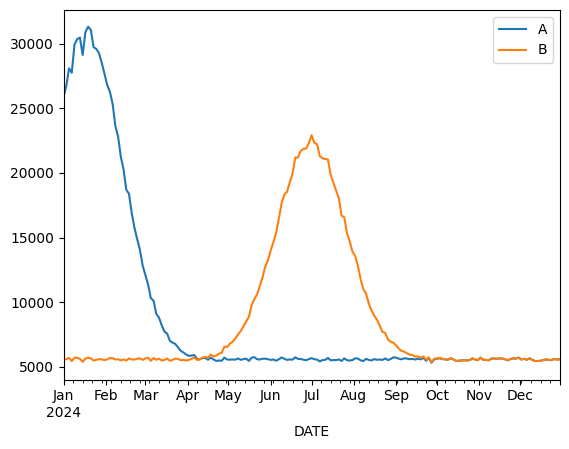

In [16]:
# 코드 1-8. 2일 단위로 집계한 결과를 시각화하기
df2.resample('2D', on='DATE').sum().plot()